<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate number detection.

Before runing this demo, please download models from [https://nomeroff.net.ua/models/](https://nomeroff.net.ua/models/) to **./models/** directory. 

In [1]:
import os
import matplotlib.pyplot as plt
from glob import glob

from _paths import nomeroff_net_dir
from nomeroff_net import pipeline
from nomeroff_net.tools import unzip

In [2]:
multiline_number_plate_detection_and_reading = pipeline("multiline_number_plate_detection_and_reading", 
                                                        image_loader="opencv")

YOLOv5 🚀 v6.0-154-gb8a4bab torch 1.9.0+cu102 CPU

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients


Loading weights from checkpoint (/mnt/data/var/www/nomeroff-net/examples/../nomeroff_net/tools/../../data/./models/np_points_craft/craft_mlt/craft_mlt_25k_2020-02-16.pth)
Loading weights of refiner from checkpoint (/mnt/data/var/www/nomeroff-net/examples/../nomeroff_net/tools/../../data/./models/np_points_craft/craft_refiner/craft_refiner_CTW1500_2020-02-16.pth)


In [3]:
result = multiline_number_plate_detection_and_reading(glob(os.path.join(nomeroff_net_dir,
                                                                        './data/examples/multiline_images/*')))

/mnt/data/var/www/nomeroff-net/examples/../nomeroff_net/nnmodels/numberplate_options_model.py:112: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x1 = functional.softmax(self.fc3_reg(x1))
/mnt/data/var/www/nomeroff-net/examples/../nomeroff_net/nnmodels/numberplate_options_model.py:121: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x2 = functional.softmax(self.fc3_line(x2))
/mnt/data/var/www/nomeroff-net/examples/../nomeroff_net/nnmodels/numberplate_options_model.py:112: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x1 = functional.softmax(self.fc3_reg(x1))
/mnt/data/var/www/nomeroff-net/examples/../nomeroff_net/nnmodels/numberplate_options_model.py:121: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as 

In [4]:
(images, images_bboxs, 
 images_points, images_zones, region_ids, 
 region_names, count_lines, 
 confidences, texts) = unzip(result)

['AI7007ET']


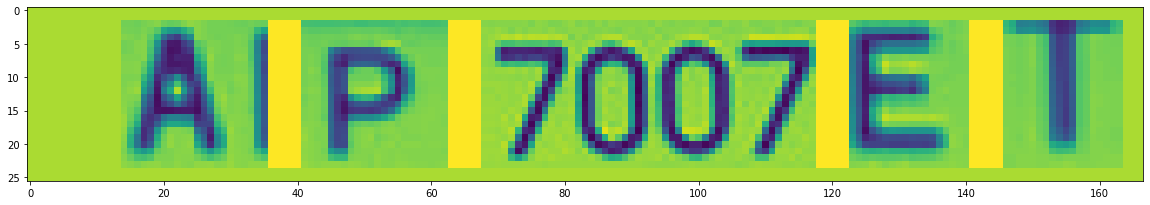

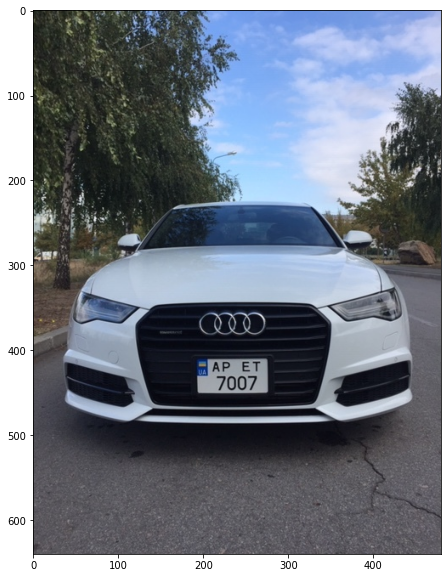

['241VBZ10']


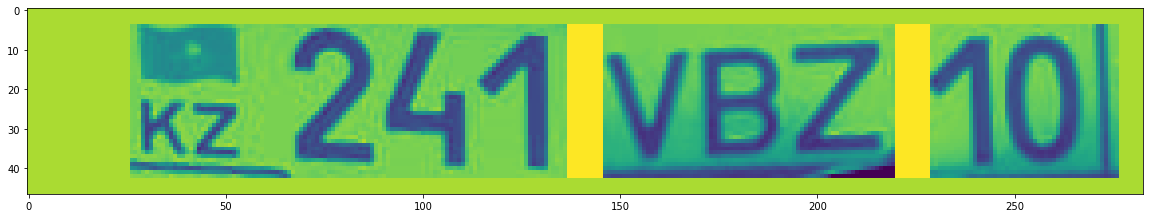

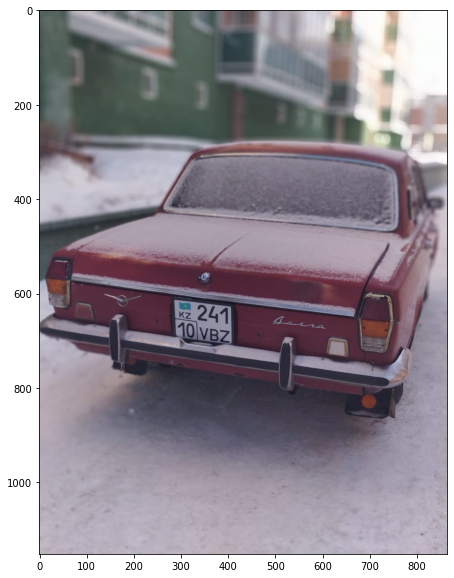

In [5]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

for img, image_zones, np in zip(images, images_zones, texts):
    print(np)
    for image_zone in image_zones:
        plt.imshow(image_zone)
        plt.show()
    
    plt.imshow(img)
    plt.show()